# Predictive Maintenance (NASA Turbofan) – FD001

*A simple notebook following the style of your Iris Decision Tree project.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report


In [2]:
# Style (match your Iris vibe)
sns.set(style="whitegrid", context="notebook")
plt.rcParams['figure.figsize'] = (8, 4)

In [3]:
# Load labeled FD001 data
train_path = r"FD001_train_labeled.csv"
test_path = r"FD001_test_labeled.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
print(df_train.shape, df_test.shape)
df_train.head()


(20631, 27) (13096, 29)


,unit,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,125
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,125
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,125
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,125
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,125


In [4]:
df_train.head()


,unit,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,125
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,125
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,125
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,125
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,125


In [5]:
df_test. head()

,unit,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,eol,RUL_extra,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8.4052,0.03,392,2388,100.0,38.86,23.3735,31,112,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8.3803,0.03,393,2388,100.0,39.02,23.3916,31,112,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8.4441,0.03,393,2388,100.0,39.08,23.4166,31,112,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8.3917,0.03,391,2388,100.0,39.00,23.3737,31,112,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8.4031,0.03,390,2388,100.0,38.99,23.4130,31,112,138


In [6]:
df_test.isna().sum()

unit         0
cycle        0
setting1     0
setting2     0
setting3     0
s1           0
s2           0
s3           0
s4           0
s5           0
s6           0
s7           0
s8           0
s9           0
s10          0
s11          0
s12          0
s13          0
s14          0
s15          0
s16          0
s17          0
s18          0
s19          0
s20          0
s21          0
eol          0
RUL_extra    0
RUL          0
dtype: int64

In [7]:
df_train.isna().sum()

unit        0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
RUL         0
dtype: int64

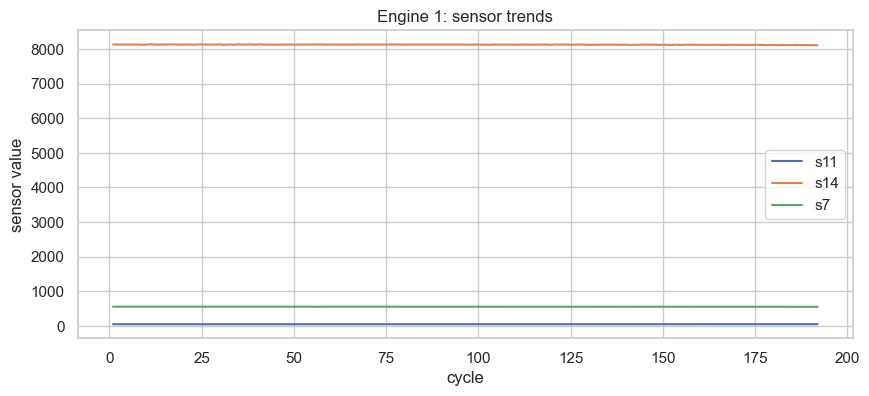

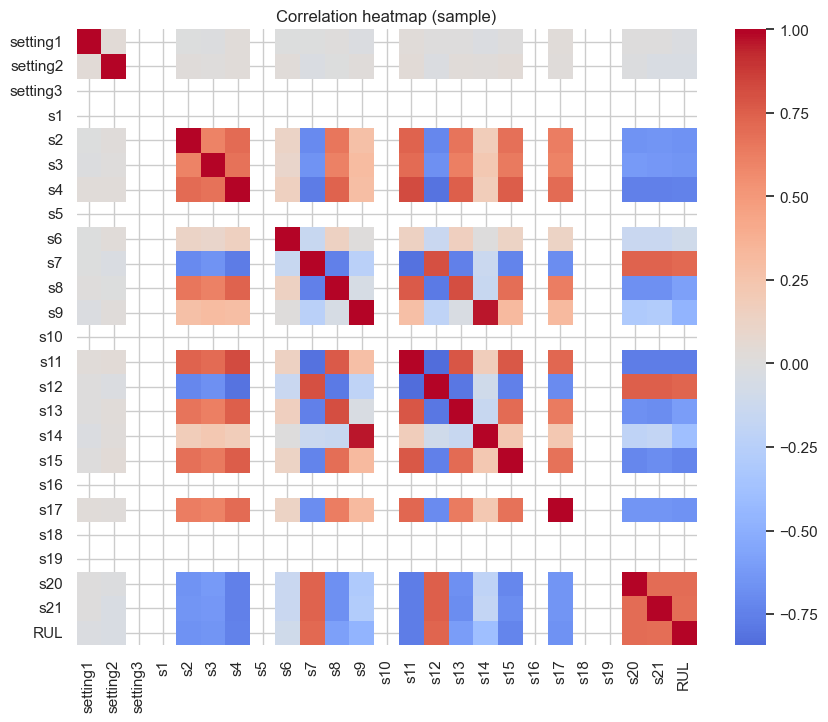

In [8]:
# Select a single engine for visualization
uid = df_train['unit'].iloc[0]
g = df_train[df_train['unit'] == uid].sort_values('cycle')

plt.figure(figsize=(10,4))
plt.plot(g['cycle'], g['s11'], label='s11')
plt.plot(g['cycle'], g['s14'], label='s14')
plt.plot(g['cycle'], g['s7'], label='s7')
plt.xlabel('cycle'); plt.ylabel('sensor value'); plt.legend(); plt.title(f'Engine {uid}: sensor trends'); plt.show()

# Correlation heatmap for a sample
sample = df_train.sample(2000, random_state=42)
corr = sample[[c for c in sample.columns if c.startswith('s') or c.startswith('setting')]+['RUL']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation heatmap (sample)')
plt.show()


In [ ]:
sensor_cols = [f's{i}' for i in range(1,22)]   #feature selection
keep_sensors = ['s2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20','s21']
feat_cols = ['setting1','setting2','setting3'] + keep_sensors
target_col = 'RUL'

X = df_train[feat_cols].copy()
y = df_train[target_col].copy()

# Simple train/val split (note: for strict time-aware validation, use engine-wise split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape


((16504, 17), (4127, 17))

{'RMSE': np.float64(21.239211951435415), 'MAE': 14.874619260835688, 'R2': 0.734102910824093}


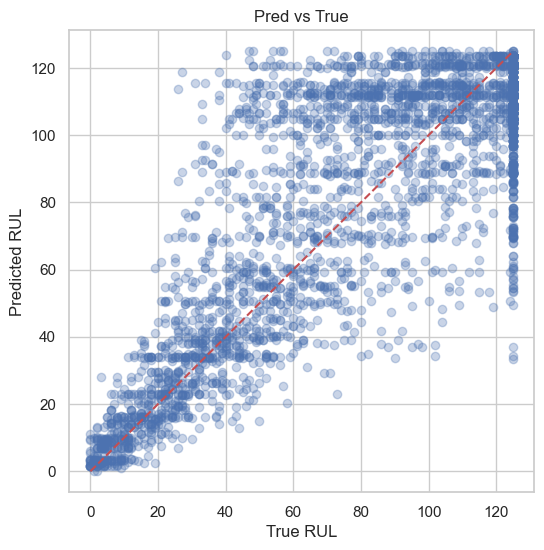

In [ ]:
reg = DecisionTreeRegressor(random_state=42, max_depth=10)  #Decision Tree Regressor
reg.fit(X_train, y_train)
pred = reg.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, pred))
mae = mean_absolute_error(y_val, pred)
r2 = r2_score(y_val, pred)

print({'RMSE': rmse, 'MAE': mae, 'R2': r2})

plt.figure(figsize=(6,6))
plt.scatter(y_val, pred, alpha=0.3)
plt.xlabel('True RUL'); plt.ylabel('Predicted RUL'); plt.title('Pred vs True')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.show()


Accuracy: 0.9529924884904288
Confusion Matrix:
 [[3464   79]
 [ 115  469]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3543
           1       0.86      0.80      0.83       584

    accuracy                           0.95      4127
   macro avg       0.91      0.89      0.90      4127
weighted avg       0.95      0.95      0.95      4127



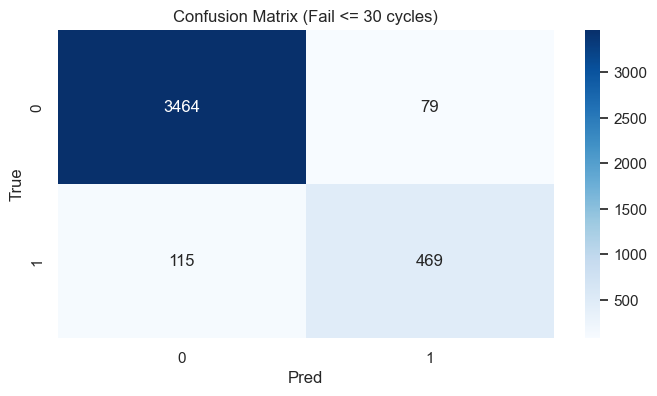

In [ ]:
threshold = 30                                    # Classification – Will it fail within next 30 cycles?
y_cls = (df_train['RUL'] <= threshold).astype(int)
Xc = df_train[feat_cols]

Xc_train, Xc_val, yc_train, yc_val = train_test_split(Xc, y_cls, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42, max_depth=8)
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_val)

acc = accuracy_score(yc_val, yc_pred)
cm = confusion_matrix(yc_val, yc_pred)
print('Accuracy:', acc)
print('Confusion Matrix:\n', cm)
print(classification_report(yc_val, yc_pred))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Fail <= 30 cycles)'); plt.xlabel('Pred'); plt.ylabel('True'); plt.show()


In [ ]:
def time_aware_engine_split(df, feat_cols, target_col='RUL', val_last_engines=20):  ## Time-aware validation
    # Use engine IDs sorted ascending; hold out the last N as validation
    engine_ids = sorted(df['unit'].unique())
    val_ids = set(engine_ids[-val_last_engines:])
    tr_df = df[~df['unit'].isin(val_ids)]
    va_df = df[df['unit'].isin(val_ids)]
    Xtr, ytr = tr_df[feat_cols].copy(), tr_df[target_col].copy()
    Xva, yva = va_df[feat_cols].copy(), va_df[target_col].copy()
    return Xtr, Xva, ytr, yva

# Example usage (keeps earlier random split cells intact for comparison)
Xtr_ta, Xva_ta, ytr_ta, yva_ta = time_aware_engine_split(df_train, feat_cols, target_col='RUL', val_last_engines=20)
Xtr_ta.shape, Xva_ta.shape

((16138, 17), (4493, 17))

Best params: {'max_depth': 10, 'min_samples_leaf': 10}
{'RMSE_timeaware': np.float64(21.11844520322408), 'MAE_timeaware': 15.20243224049371, 'R2_timeaware': 0.7382811363671298}


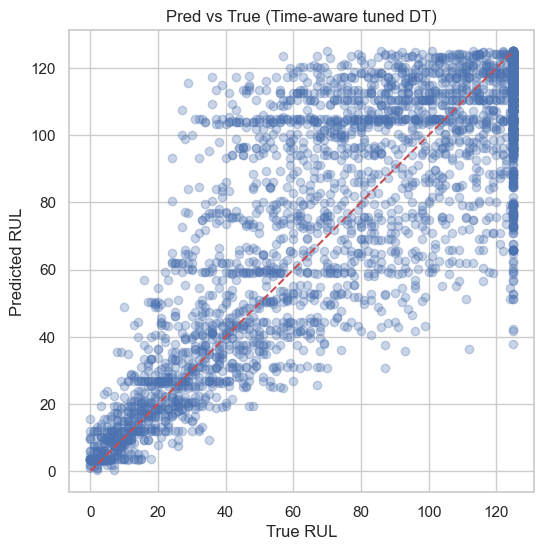

In [ ]:
from sklearn.model_selection import GridSearchCV     ## Grid Search (DecisionTreeRegressor)

param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_leaf': [1, 5, 10]
}
reg_gs = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1
)
reg_gs.fit(Xtr_ta, ytr_ta)
best_reg = reg_gs.best_estimator_
pred_ta = best_reg.predict(Xva_ta)

rmse_ta = np.sqrt(mean_squared_error(yva_ta, pred_ta))
mae_ta = mean_absolute_error(yva_ta, pred_ta)
r2_ta = r2_score(yva_ta, pred_ta)
print('Best params:', reg_gs.best_params_)
print({'RMSE_timeaware': rmse_ta, 'MAE_timeaware': mae_ta, 'R2_timeaware': r2_ta})

plt.figure(figsize=(6,6))
plt.scatter(yva_ta, pred_ta, alpha=0.3)
plt.xlabel('True RUL'); plt.ylabel('Predicted RUL'); plt.title('Pred vs True (Time-aware tuned DT)')
plt.plot([yva_ta.min(), yva_ta.max()], [yva_ta.min(), yva_ta.max()], 'r--')
plt.show()

Best params (cls): {'max_depth': 6, 'min_samples_leaf': 10}
Accuracy: 0.95105403440756


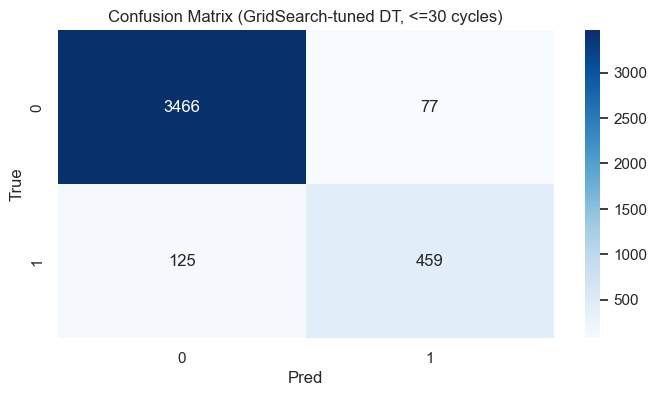

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3543
           1       0.86      0.79      0.82       584

    accuracy                           0.95      4127
   macro avg       0.91      0.88      0.90      4127
weighted avg       0.95      0.95      0.95      4127



In [ ]:
param_grid_cls = {                           ## Grid Search (DecisionTreeClassifier)
    'max_depth': [4, 6, 8, None],
    'min_samples_leaf': [1, 5, 10]
}
clf_gs = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_cls,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)
clf_gs.fit(Xc_train, yc_train)
yc_pred_gs = clf_gs.predict(Xc_val)
print('Best params (cls):', clf_gs.best_params_)
print('Accuracy:', accuracy_score(yc_val, yc_pred_gs))
cm = confusion_matrix(yc_val, yc_pred_gs)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (GridSearch-tuned DT, <=30 cycles)'); plt.xlabel('Pred'); plt.ylabel('True'); plt.show()
print(classification_report(yc_val, yc_pred_gs))